In [2]:
import numpy as np  
import matplotlib.pyplot as plt 

%matplotlib inline 

In [3]:
distances = [10, 20, 30, 50, 60, 70, 100]
count_rates = [213.7, 81, 36, 16.7, 11.5, 9.3, 4.3]

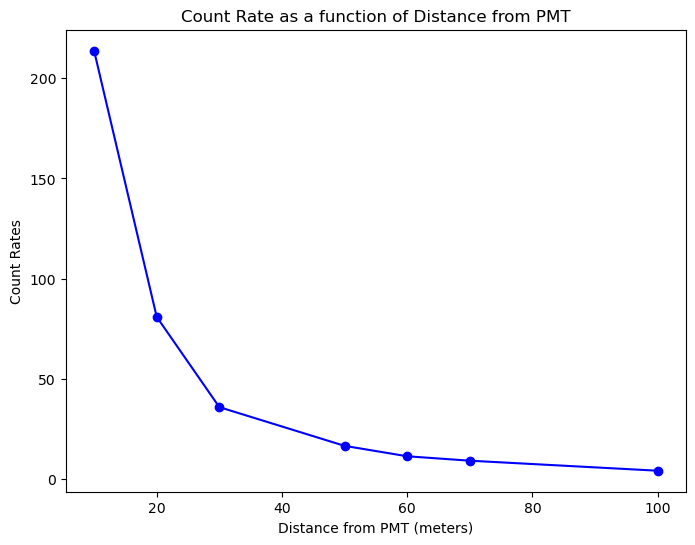

In [4]:
plt.figure(figsize=(8,6))
plt.plot(distances, count_rates, marker='o', linestyle='-', color='b')
plt.xlabel('Distance from PMT (meters)')
plt.ylabel('Count Rates')
plt.title('Count Rate as a function of Distance from PMT')
plt.show()

In [5]:
linearized_distance=(1/np.square(distances))
print(linearized_distance)

[0.01       0.0025     0.00111111 0.0004     0.00027778 0.00020408
 0.0001    ]


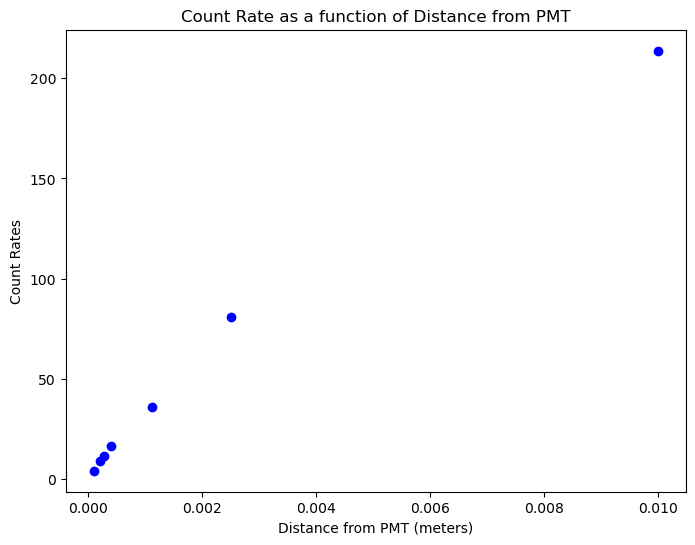

In [6]:
plt.figure(figsize=(8,6))
plt.scatter(linearized_distance, count_rates, color='b')
plt.xlabel('Distance from PMT (meters)')
plt.ylabel('Count Rates')
plt.title('Count Rate as a function of Distance from PMT')
plt.show()

In [7]:
coefficients = np.polyfit(linearized_distance, count_rates, 1)
trend_line = np.poly1d(coefficients)
print(coefficients)

[2.08806915e+04 9.68409783e+00]


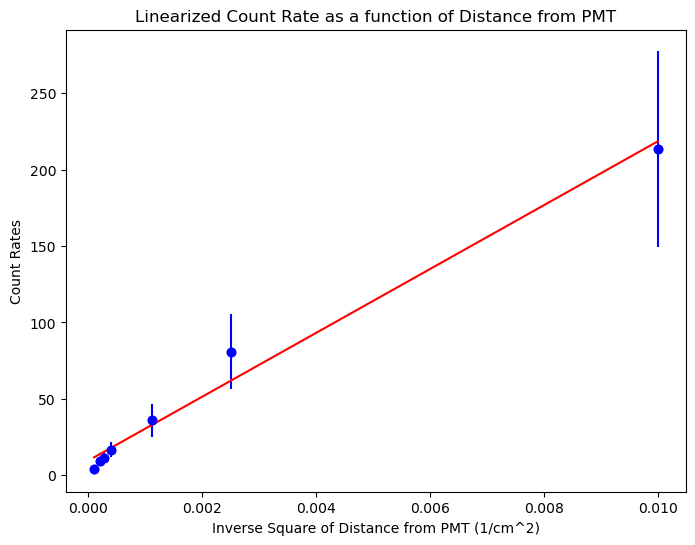

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(linearized_distance, count_rates, color='b')
y_trend = trend_line(linearized_distance)
error=0.3*np.array(count_rates)
plt.errorbar(linearized_distance, count_rates, fmt='o', yerr=error, color='b')
plt.plot(linearized_distance, y_trend, color='red', label='Trend Line')
plt.xlabel('Inverse Square of Distance from PMT (1/cm^2)')
plt.ylabel('Count Rates')
plt.title('Linearized Count Rate as a function of Distance from PMT')
plt.show()

In [8]:
intervals=np.loadtxt('0.4s raw data.txt')

In [9]:
print('size of array', intervals.size)
print('mean of array', intervals.mean())
print('variance of array', intervals.var())



size of array 10249
mean of array 0.006738768581325007
variance of array 4.589071346590545e-05


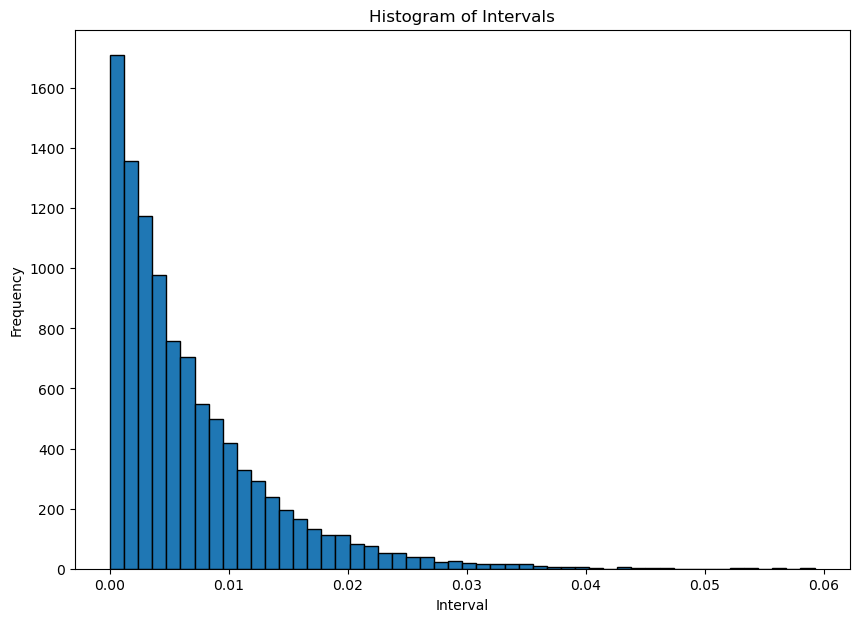

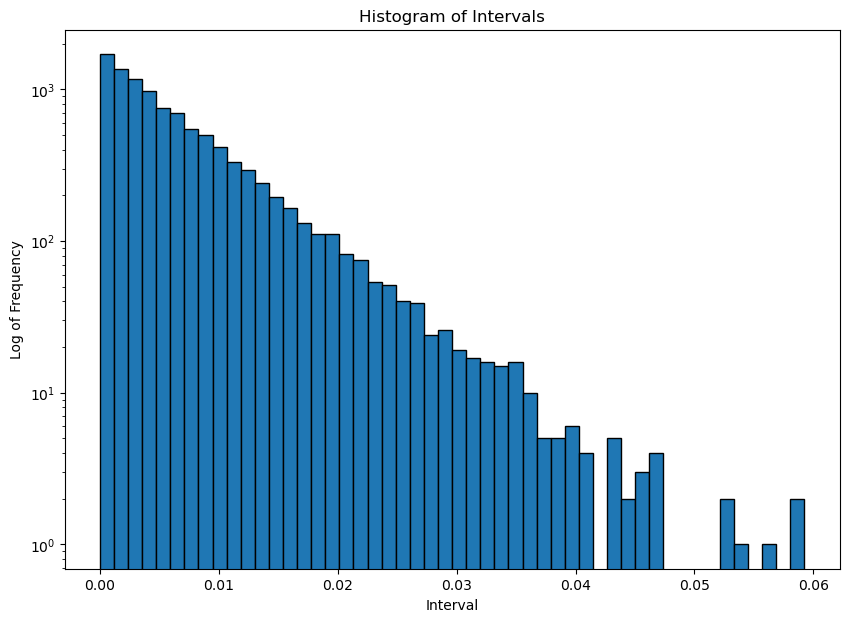

In [10]:
plt.figure(figsize=(10,7))

plt.hist(intervals, bins=50, edgecolor='black')


plt.xlabel('Interval')
plt.ylabel('Frequency')
plt.title('Histogram of Intervals')


plt.show()

plt.figure(figsize=(10,7))

plt.hist(intervals, bins=50, edgecolor='black')


plt.yscale('log')
plt.xlabel('Interval')
plt.ylabel('Log of Frequency')
plt.title('Histogram of Intervals')
plt.show()


#this is a lognormal distribution

In [11]:
def make_count_dist(interval_dist,fixed_interval_length):
    count_dist = np.zeros(0,dtype=int)
    fixedIntervalSum = fixed_interval_length 
    intervalDistributionSum = 0
    this_intervals_counts=0 

    for interval in interval_dist:
        intervalDistributionSum+=interval
 
        if ( intervalDistributionSum <= fixedIntervalSum ):
            this_intervals_counts+=1 
        
        else: 
            count_dist = np.append(count_dist, this_intervals_counts) 
            this_intervals_counts=1
            fixedIntervalSum += fixed_interval_length
             
            while (intervalDistributionSum > fixedIntervalSum):            
                fixedIntervalSum+=fixed_interval_length
                count_dist=np.append(count_dist,0)     
                
    return count_dist

In [12]:
test_dist = intervals[0:100]
test_interval = .2 # seconds
counts_array = make_count_dist(test_dist,fixed_interval_length=test_interval)


print('Number of counts = {:d}'.format(counts_array.sum()))
print('Mean = {:.4f}'.format(counts_array.mean()))
print('Variance = {:.4f}'.format(counts_array.var()))

Number of counts = 93
Mean = 31.0000
Variance = 12.6667


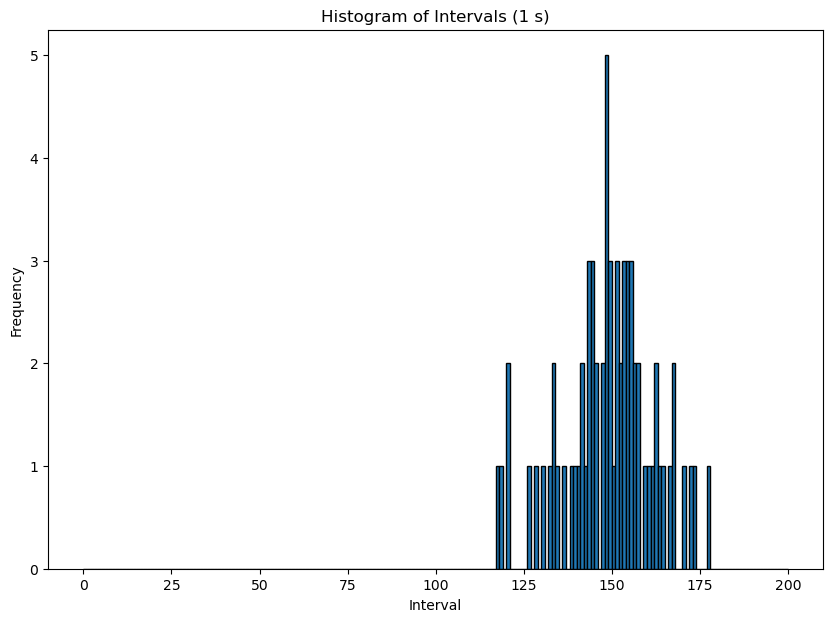

In [18]:
test_dist = intervals
test_interval = 1 
counts_array = make_count_dist(test_dist,fixed_interval_length=test_interval)


mybins=200
plt.figure(figsize=(10,7))

plt.hist(counts_array, bins=mybins, range=(0,mybins), edgecolor='black')

plt.xlabel('Interval')
plt.ylabel('Frequency')
plt.title('Histogram of Intervals (1 s)')

plt.show()

In [49]:
from scipy.stats import poisson

def poisson_theory(count_dist, bins):
    mean_count = np.mean(count_dist)
    bins = np.arange(bins)
    poisson_dist = poisson.pmf(bins, mean_count)
    poisson_dist_normalized = poisson_dist * len(count_dist)
    
    return poisson_dist_normalized

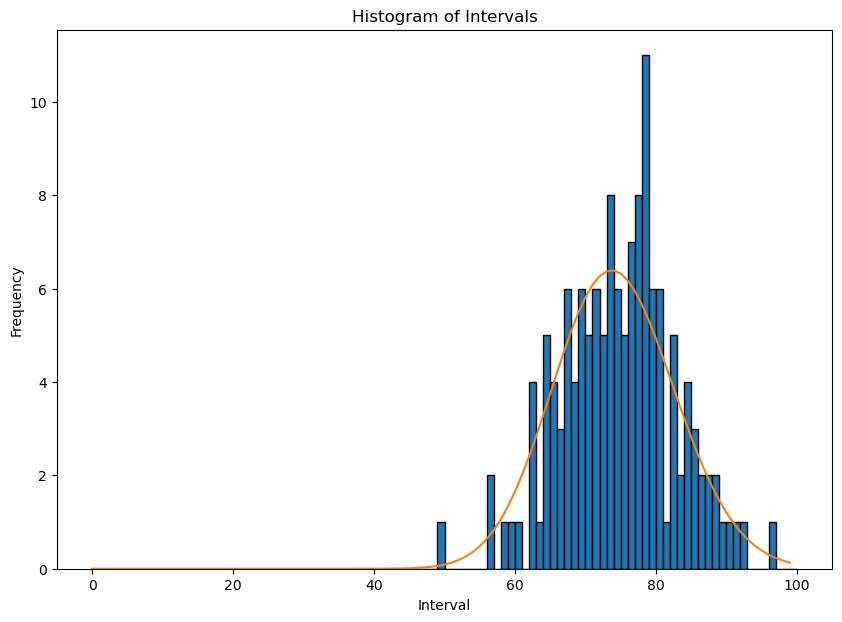

In [50]:
mybins=100
theory=poisson_theory(counts_array, mybins)

plt.figure(figsize=(10,7))

plt.hist(counts_array, bins=mybins, range=(0,mybins), edgecolor='black')
plt.plot(poisson_theory(counts_array, mybins),'-')

plt.xlabel('Interval')
plt.ylabel('Frequency')
plt.title('Histogram of Intervals')

plt.show()

<Figure size 1000x700 with 0 Axes>

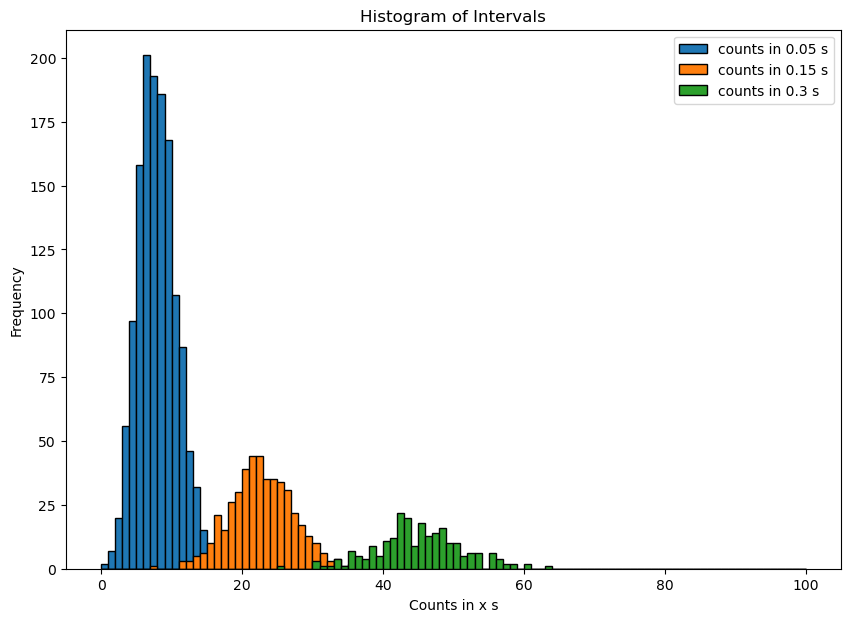

In [57]:
mybins = 60
kwargs = dict(bins=mybins, range=(0,mybins), alpha=0.5)
plt.figure(figsize=(10,7))


test_interval=0.05
counts_array_point_o_five = make_count_dist(test_dist,fixed_interval_length=test_interval)
test_interval=0.15
counts_array_point_one_five = make_count_dist(test_dist,fixed_interval_length=test_interval)
test_interval=0.3
counts_array_point_three = make_count_dist(test_dist,fixed_interval_length=test_interval)

mybins=100
plt.figure(figsize=(10,7))

plt.hist(counts_array_point_o_five, bins=mybins, range=(0,mybins), edgecolor='black', label='counts in 0.05 s')
plt.hist(counts_array_point_one_five, bins=mybins, range=(0,mybins), edgecolor='black', label='counts in 0.15 s')
plt.hist(counts_array_point_three, bins=mybins, range=(0,mybins), edgecolor='black', label='counts in 0.3 s')

plt.legend()

plt.xlabel('Counts in x s')
plt.ylabel('Frequency')
plt.title('Histogram of Intervals')


plt.show()

In [4]:
delay_times = np.array([24, 20, 16, 12, 8, 4, 0, -4, -8, -12, -16, -20, -24], dtype=float)
delay_counts = np.array([15.5, 20, 44.5, 162, 402, 666, 694, 680, 259.5, 176.6, 105, 84, 103], dtype=int)

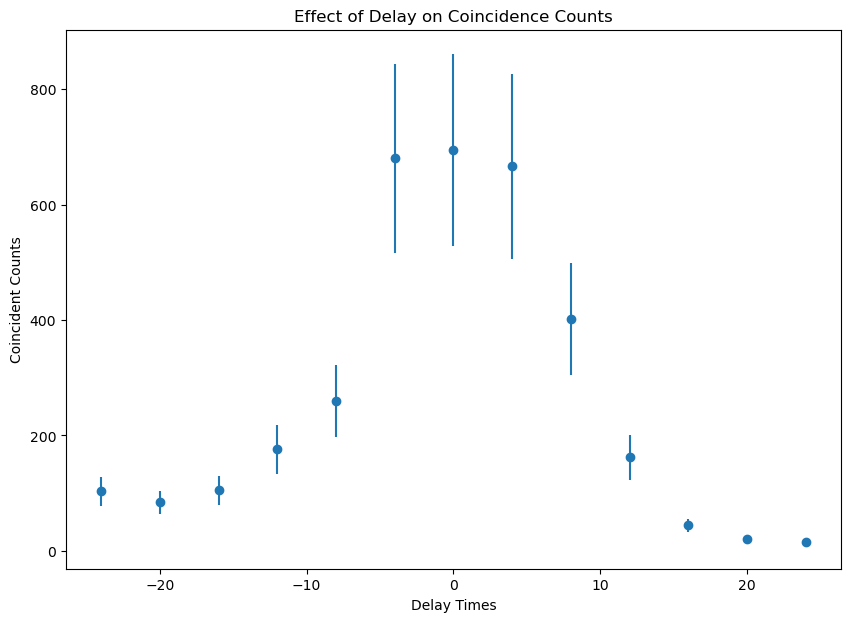

In [5]:
plt.figure(figsize=(10,7))

err = 0.24*delay_counts
plt.errorbar(delay_times, delay_counts, fmt='o', yerr=err)

plt.xlabel('Delay Times')
plt.ylabel('Coincident Counts')
plt.title('Effect of Delay on Coincidence Counts')

plt.show()

In [6]:
def get_centroid(xdata,ydata):
    centroid=np.sum(xdata*ydata)/(np.sum(ydata))
    return centroid

best_delay = get_centroid(delay_times,delay_counts)
print('Optimal delay = {:.2f} ns'.format(best_delay))

Optimal delay = -1.01 ns


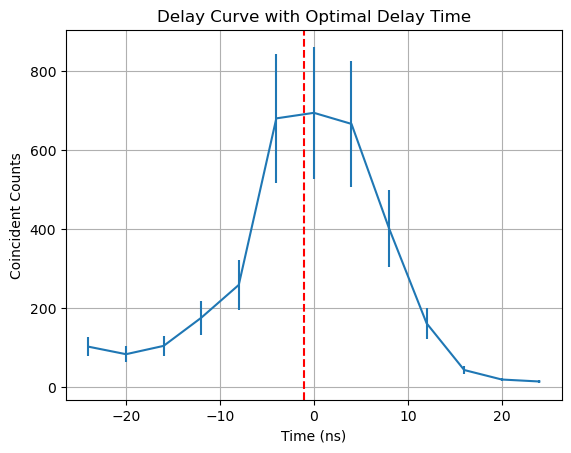

In [7]:
plt.errorbar(delay_times, delay_counts, yerr=err)
plt.axvline(x=best_delay, color='r', linestyle='--')
plt.grid(True)

plt.xlabel('Time (ns)')
plt.ylabel('Coincident Counts')
plt.title('Delay Curve with Optimal Delay Time')

plt.show()